# Información Mutua

## Caso de uso: Precio de habitaciones según sus características




## Objetivo

Identificar las características más influyentes apartir un conjunto inicial de características en el conjunto de datos [*Ames*] utilizando puntuaciones de información mutua.

Se utilizará visualización para contrastar los resultados.

El dataset tiene una cantidad importante de características.


## Importación de bibliotecas

El resumen los puedes encontrar en: [descripción de ames](https://gist.github.com/ericksc/c30bcf4759e7849d8d8495d32695ab06)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

## Extracción de datos

In [5]:
# Cargar los datos desde archivo
df = pd.read_csv("ames.csv")
df.head()

MSSubClass                  MSZoning  LotFrontage  \
0  One_Story_1946_and_Newer_All_Styles   Residential_Low_Density        141.0   
1  One_Story_1946_and_Newer_All_Styles  Residential_High_Density         80.0   
2  One_Story_1946_and_Newer_All_Styles   Residential_Low_Density         81.0   
3  One_Story_1946_and_Newer_All_Styles   Residential_Low_Density         93.0   
4             Two_Story_1946_and_Newer   Residential_Low_Density         74.0   

   LotArea Street            Alley            LotShape LandContour Utilities  \
0  31770.0   Pave  No_Alley_Access  Slightly_Irregular         Lvl    AllPub   
1  11622.0   Pave  No_Alley_Access             Regular         Lvl    AllPub   
2  14267.0   Pave  No_Alley_Access  Slightly_Irregular         Lvl    AllPub   
3  11160.0   Pave  No_Alley_Access             Regular         Lvl    AllPub   
4  13830.0   Pave  No_Alley_Access  Slightly_Irregular         Lvl    AllPub   

  LotConfig  ... PoolArea   PoolQC            Fence MiscFeature  MiscVal  \
0    Corner  ...      0.0  No_Pool         No_Fence        None      0.0   
1    Inside  ...      0.0  No_Pool  Minimum_Privacy        None      0.0   
2    Corner  ...      0.0  No_Pool         No_Fence        Gar2  12500.0   
3    Corner  ...      0.0  No_Pool         No_Fence        None      0.0   
4    Inside  ...      0.0  No_Pool  Minimum_Privacy        None      0.0   

  MoSold YearSold SaleType  SaleCondition  SalePrice  
0      5     2010      WD          Normal     215000  
1      6     2010      WD          Normal     105000  
2      6     2010      WD          Normal     172000  
3      4     2010      WD          Normal     244000  
4      3     2010      WD          Normal     189900  

[5 rows x 79 columns]

## Preprocesamiento

## Separando características y las etiquetas

In [7]:
X = df.copy()
y = X.pop('SalePrice')

### Codificando las características de variable continua y las variable discreta

El algoritmo scikit-learn para MI trata las características discretas de manera diferente a las características continuas. 

En consecuencia, debe decirle cuáles son cuáles. Como regla general, cualquier cosa que deba tener un  tipo flotante no es  discreta. 

Los del tipo categóricos (objeto o  tipo dtype categorial que es un término de la biblioteca de pandas) se pueden tratar como discretos dándoles una codificación de etiqueta.

In [8]:
# Codifica etiquetas a las columnas que no son numéricas. Por ejemplo las que tienen texto
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# Es un marcado o bandera para señalar cual columna tiene información discreta.
# Es importante paso. Asegurese de tenerla
discrete_features = X.dtypes == int

Scikit-learn tiene dos métricas de información mutua en su módulo de feature_selection: 

- objetivos de valor real (mutual_info_regression)
- objetivos categóricos (mutual_info_classif). 

Nuestro objetivo, el precio, tiene un valor real, por lo tanto se usa mutual_info_regression. 

La siguiente celda calcula las puntuaciones de MI para nuestras características y las envuelve la información ordenando de mayor a menor.

## Obtención de mutual information

In [10]:

mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

## Visualización

-------------------------------------------------------------------------------

Para empezar, se revisará el significado de la información mutua observando algunas características del conjunto de datos *Ames*.

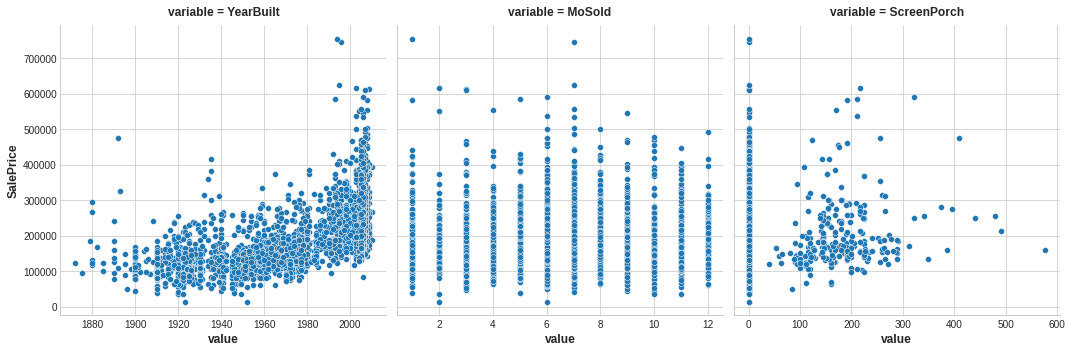

In [ ]:
features = ["YearBuilt", "MoSold", "ScreenPorch"]
sns.relplot(
    x="value", y="SalePrice", col="variable", data=df.melt(id_vars="SalePrice", value_vars=features), facet_kws=dict(sharex=False),
);

### 1) Comprender la información mutua

Según las figuras, ¿qué característica crees que tendría la mayor información mutua con 'SalePrice'?


Según las figuras, YearBuilt debería tener la puntuación de MI más alta, ya que conocer el año tiende a restringir SalePrice a un rango más pequeño de valores posibles. Sin embargo, este no es generalmente el caso de MoSold. Finalmente, dado que ScreenPorch suele ser sólo un valor, 0, en promedio no le dirá mucho sobre SalePrice (aunque más que MoSold).





-------------------------------------------------------------------------------

El conjunto de datos *Ames* tiene setenta y ocho características, ¡mucho con lo que trabajar a la vez! Afortunadamente, puede identificar las características con más potencial.

La variable mi_scores, calculada previamente contiene las puntuaciones de información mutua para las características *Ames*:





Se examina las puntuaciones. Mire especialmente en los rangos superior e inferior.

In [11]:
mi_scores.head(20)

OverallQual     0.588085
Neighborhood    0.579300
GrLivArea       0.495878
YearBuilt       0.439060
GarageArea      0.416121
TotalBsmtSF     0.391580
GarageCars      0.390140
FirstFlrSF      0.370687
BsmtQual        0.370050
ExterQual       0.324448
KitchenQual     0.323599
YearRemodAdd    0.321352
MSSubClass      0.289057
GarageFinish    0.276866
FullBath        0.268999
LotFrontage     0.237565
Foundation      0.233896
GarageType      0.233337
FireplaceQu     0.228946
SecondFlrSF     0.208953
Name: MI Scores, dtype: float64

In [15]:
# Cantidad de características
mi_scores.shape

(78,)

Seleccionando los primeros 20 MI Scores dado que son originalmente 78. 

Dado que son una cantidad importante de características

Text(0.5, 1.0, 'Mutual Information Scores')

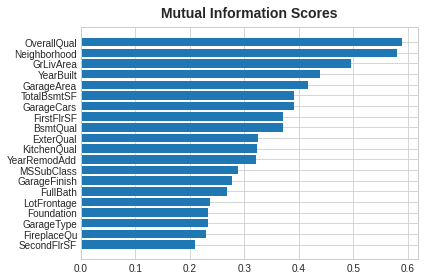

In [20]:
scores = mi_scores.sort_values(ascending=True)[-20:]
width = np.arange(len(scores))
ticks = list(scores.index)
plt.barh(width, scores)
plt.yticks(width, ticks)
plt.title("Mutual Information Scores")

### 2) Examinar los puntajes de MI

¿Los puntajes parecen razonables? 

¿Las características de alta puntuación representan cosas que pensarías que la mayoría de la gente valoraría en una casa? 

¿Notas algún tema en lo que describen?

Algunos temas comunes entre la mayoría de estas características son:

Ubicación: Neighborhood

Tamaño: todas las características de Area y SF, y cuenta como FullBath y GarageCars

Calidad: todas las características de Qual

Año: YearBuilt y YearRemodAdd

Tipos: descripciones de características y estilos como Foundation y GarageType

Estos son todos los tipos de características que verá comúnmente en los listados de bienes raíces (como en Zillow). Es bueno entonces que nuestra métrica de información mutua los califique altamente. 

Por otro lado, las características de menor rango parecen representar principalmente cosas que son raras o excepcionales de alguna manera, por lo que no serían relevantes para el comprador promedio de viviendas.




-------------------------------------------------------------------------------

En este paso, investigará los posibles efectos de interacción para la función 'BldgType'. Esta característica describe la amplia estructura de la vivienda en cinco categorías:

BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

La función 'BldgType' no obtuvo una puntuación de Mutual Information muy alta. 

Un gráfico confirma que las categorías en 'BldgType' no hacen un buen trabajo al distinguir valores en 'SalePrice' esto es: las distribuciones se ven bastante similares, en otras palabras.




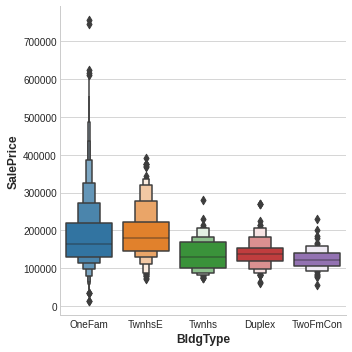

In [ ]:
sns.catplot(x="BldgType", y="SalePrice", data=df, kind="boxen");

Aún así, el tipo de vivienda parece que debería ser información importante. Investigue si 'BldgType' produce una interacción significativa con cualquiera de los siguientes:

```
GrLivArea: Above grade (ground) living area square feet
MoSold: Month Sold (MM)
```

Ejecute la siguiente celda dos veces, la primera vez con 'feature = "GrLivArea"' y la próxima vez con 'feature="MoSold"':




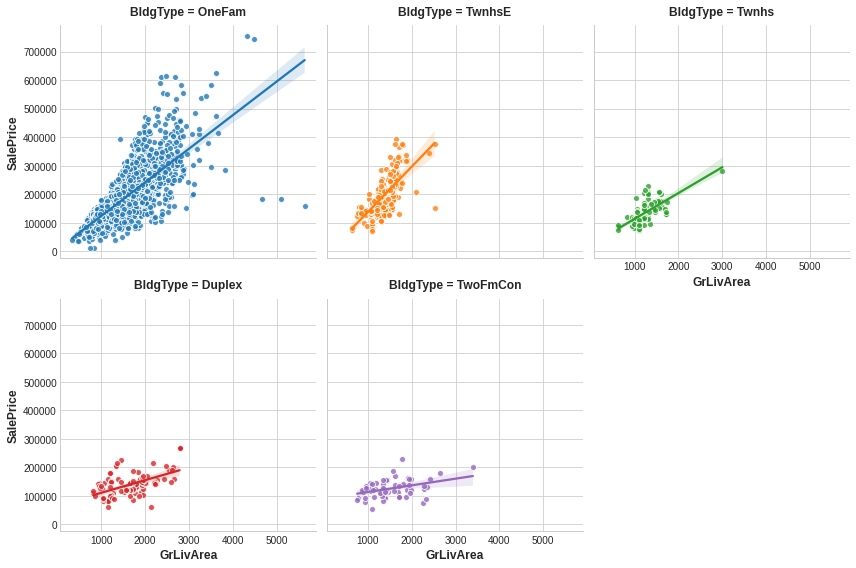

In [21]:
feature = "GrLivArea"

sns.lmplot(
    x=feature, y="SalePrice", hue="BldgType", col="BldgType",
    data=df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
);

Las líneas de tendencia que son significativamente diferentes de una categoría ***BldgType*** que indican un efecto de interacción.

### 3) Descubrir interacciones

A partir de las tramas, ¿'BldgType' parece exhibir un efecto de interacción con 'GrLivArea' o 'MoSold'?

Las líneas de tendencias dentro de cada categoría de BldgType son claramente muy diferentes, lo que indica una interacción entre estas características. Dado que conocer BldgType nos dice más sobre cómo GrLivArea se relaciona con SalePrice, debemos considerar incluir BldgType en nuestro conjunto de características.

Las líneas de tendencia para MoSold, sin embargo, son casi todas iguales. Esta característica no se ha vuelto más informativa para conocer BldgType.